In [1]:
#set WD
import os
os.getcwd()
os.chdir('C:\\Users\\AT003502\\Documents\Phishing project')

In [89]:
#Import libraries
import pandas as pd
import numpy as np
import sklearn 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import re
%matplotlib notebook
from urllib.parse import urlparse
import whois
import datetime
import time
#import httplib2
import urllib
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

ModuleNotFoundError: No module named 'httplib2'

In [4]:
#Data preprocessing

In [76]:
DATA_PATH = 'URL.csv'
#DATA_PATH='verified_online.csv'
dataframe = pd.read_csv(DATA_PATH, index_col=0)

In [1]:
dataframe.sample(n=5)
dataframe.head()

NameError: name 'dataframe' is not defined

In [7]:
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'LENGTH'] = len(row['url'])

In [8]:
dataframe.sample(n=5)

,url,list,LENGTH
Index,,,
679,http://stan.asia.com,1,20.0
627,http://1br.net,1,14.0
726,http://givemeknol.com,1,21.0
665,http://moonlight.asia.com,1,25.0
549,http://amazon.cn,0,16.0


Text(0,0.5,'Label')

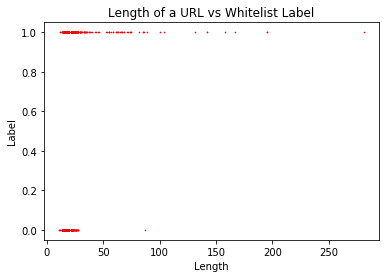

In [9]:
plt.plot(dataframe.LENGTH.values,  dataframe.list.values, 'r*', markersize='1')
plt.title('Length of a URL vs Whitelist Label')
plt.xlabel('Length')
plt.ylabel('Label')

### Feature Exraction for URLs

In [10]:
#suffix ends in RU
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'RU'] = 1.0 if '.ru' in row['url'] else 0.0

In [11]:
#suffix ends in .com
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Com'] = 1.0 if '.com' in row['url'] else 0.0

In [12]:
#suffix ends in .org
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Org'] = 1.0 if '.org' in row['url'] else 0.0

In [13]:
#suffix ends in .co
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'Co'] = 1.0 if '.co.' in row['url'] else 0.0

In [14]:
#IP address in the url
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'IP_add'] = 1.0 if re.search( r'[0-9]+(?:\.[0-9]+){3}',(str(row['url']))) else 0.0


In [15]:
# Check for @ symbol
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'has_at_symbol'] = 1.0 if '@' in (str(row['url'])) else 0.0

In [16]:
# Prefix Suffix (i.e. has - in domain name)
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'pref_suf'] = dataframe.loc['-'] = 1.0 if '-' in row['url'] else 0.0

In [17]:
# Count number of dots
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'no_dots'] = (str(row['url'])).count(".")

In [18]:
#double slash redirection
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'redirection'] =  1 if (str(row['url'])).find("//") >8 else 0


In [9]:
#count number subdirectories in ur;
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'subdirectory'] =(str(row['url'])).count("/") 

In [45]:
#remove http:// for use with some modules
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, '_http_remv'] = (str(row['sock_test'])).replace ("http://","")

In [19]:
#domain
#t="http://google.com"
import tldextract
#tldextract.extract(t).domain
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'domain'] =tldextract.extract((str(row['url']))).domain

In [20]:
#subdomain
import tldextract
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'sub_domain'] =tldextract.extract((str(row['url']))).subdomain

In [21]:
#suffix

import tldextract
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'suffix'] =tldextract.extract((str(row['url']))).suffix

In [22]:
#domain+subdomain
dot="."
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'dom_subdom'] =((str(row['domain']))+dot+(str(row['sub_domain'])))

In [23]:
#number dots in dom+subdoman
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'dots_per_dom'] = 1 if (str(row['dom_subdom'])).count(".") > 1 else 0

In [24]:
#number dashes in url
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx,'dashes'] = (str(row['url'])).count("-") 

In [44]:
quotes="'"
for row_idx, row in dataframe.iterrows():
    dataframe.loc[row_idx, 'sock_test'] =  (quotes + (str(row['url'])) + quotes)

In [26]:
#server info
import whois
for row_idx, row in dataframe.iterrows():
    try:
        dataframe.loc[row_idx,'server_info'] =whois.whois(str(row['url'])).whois_server
    except: 
        ConnectionResetError="connection error"
      #  whois_server.error = "error" 

In [27]:
#server info
import whois
for row_idx, row in dataframe.iterrows():
    try:
        dataframe.loc[row_idx,'org_info'] =whois.whois(str(row['url'])).org
    except: 
        ConnectionResetError="connection error"
      #  whois_server.error = "error" 

In [28]:
#server info
import whois
for row_idx, row in dataframe.iterrows():
    try:
        dataframe.loc[row_idx,'exp_date'] =whois.whois(str(row['url'])).expiration_date
    except:
        ConnectionResetError="connection error"
      #  whois_server.error = "error"

In [33]:
#server info
import whois
for row_idx, row in dataframe.iterrows():
    try:
        dataframe.loc[row_idx,'creation_date'] =whois.whois(str(row['url'])).creation_date[:1]
    except:
        ConnectionResetError="connection error"
      #  whois_server.error = "error"

In [21]:
#org info
import whois
for row_idx, row in dataframe.iterrows():
    try:
        daraframe.loc[row_idx,'org_info'] =whois.whois((row['url'])).org
    except: 
        ConnectionResetError="connection error"
      #  whois_server.error = "error" 

In [3]:
DATA_PATH = 'dataframe.csv'
#DATA_PATH='verified_online.csv'
dataframe = pd.read_csv(DATA_PATH, index_col=0)

In [4]:
#domain info
import whois
for row_idx, row in dataframe.iterrows():
    try:
        dataframe.loc[row_idx,'domain_info'] =whois.whois((row['url'])).domain_name
    except: 
        ConnectionResetError="connection error"
      #  whois_server.error = "error" 

In [5]:
#check to see if organisation name matches name in domain
for row_idx, row in dataframe.iterrows():
    try:
        dataframe.loc[row_idx,'org_dom_match'] = 1.0 if re.search((str(row['domain']).lower()),(str(row['org_info']).lower())) else 0.0
    except:
        continue

In [6]:
#extracting all html info
import urllib

for row_idx, row in dataframe.iterrows():
    try:
        dataframe.loc[row_idx,'html'] = urllib.request.urlopen((row['url'])).read()
    except:
        ConnectionResetError="connection error"
#t="http://google.com"
#urllib.request.urlopen(t).read()

In [ ]:
#import urllib

#for row_idx, row in dataframe.iterrows():
# #   try:
#        dataframe.loc[row_idx,'zipcode'] = urllib.request.urlopen((row['url'])).zipcode
#  #  except:
  #      ConnectionResetError="connection error"
#t="http://google.com"
#urllib.request.urlopen(t).read()

In [78]:
from bs4 import BeautifulSoup

for row_idx, row in dataframe2.iterrows():
    try:
        soup= BeautifulSoup(row['html'])
        dataframe.loc[row_idx,'img_tags']=(str(soup.find_all('img')))
        dataframe.loc[row_idx,'meta_tags']=(str(soup.find_all('meta')))
        dataframe.loc[row_idx,'script_tags']=(str(soup.find_all('script')))
        dataframe.loc[row_idx,'link_tags']=(str(soup.find_all('link')))
    except:
        continue




C:\Users\AT003502\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\AT003502\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


##### For shortened urls  - work required on this

In [47]:
#csv.write(dataframe)

import pandas as pd
# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')

dataframe.to_csv("url_dataframe.csv")

### HTML content parsed and table saved

In [4]:

DATA_PATH = 'url_dataframe.csv'
#DATA_PATH='verified_online.csv'
dataframe2 = pd.read_csv(DATA_PATH, index_col=0)
dataframe2.head()

,url,list,LENGTH,RU,Com,Org,Co,IP_add,has_at_symbol,pref_suf,...,org_info,exp_date,creation_date,domain_info,org_dom_match,html,img_tags,meta_tags,script_tags,link_tags
Index,,,,,,,,,,,,,,,,,,,,,
1,http://google.com,0.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Google LLC,NaN,1997-09-15 04:00:00,NaN,1.0,"b'<!doctype html><html itemscope="""" itemtype=""...","[<img alt=""Google"" height=""92"" id=""hplogo"" onl...","[<meta content=""text/html; charset=utf-8"" http...","[<script nonce=""dOFDYK5u3kbF4EOBqGI8BA=="">(fun...",[]
2,http://facebook.com,0.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"Facebook, Inc.",2028-03-30 04:00:00,1997-03-29 05:00:00,FACEBOOK.COM,1.0,"b'<!DOCTYPE html>\n<html lang=""en"" id=""faceboo...","[<img alt="""" class=""img"" height=""195"" src=""htt...","[<meta charset=""utf-8""/>, <meta content=""defau...","[<script>window._cstart=+new Date();</script>,...","[<link href=""/osd.xml"" rel=""search"" title=""Fac..."
3,http://youtube.com,0.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Google LLC,NaN,NaN,NaN,0.0,"b' <!DOCTYPE html><html lang=""en"" data-cast-a...","[<img alt="""" aria-hidden=""true"" data-thumb=""//...","[<meta content=""Enjoy the videos and music you...","[<script name=""www-roboto"">if (document.fonts ...","[<link href=""/yts/cssbin/www-core-vfly_6Bdv.cs..."
4,http://yahoo.com,0.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Yahoo! Inc.,NaN,1995-01-18 05:00:00,NaN,1.0,"b'<!DOCTYPE html>\n<html id=""atomic"" lang=""en-...","[<img alt="""" class=""W(100%) Mih(215px) Mih(277...","[<meta content=""on"" http-equiv=""x-dns-prefetch...",[<script>\r\n var myYahoostartTime = new Da...,"[<link href=""//s.yimg.com"" rel=""dns-prefetch""/..."
5,http://baidu.com,0.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,2026-10-11 11:05:17,1999-10-11 11:05:17,NaN,0.0,"b'<html>\n<meta http-equiv=""refresh"" content=""...",[],"[<meta content=""0;url=http://www.baidu.com/"" h...",[],[]


### Zahoor's code

In [49]:
#Length of time website has been registered for

##Had to tweak the code Zahoor because it didn't work - you can now use the actual dates
import datetime
from datetime import date

#coerce date column into pandas dates - puts the NaNs as NaTs
dataframe2['creation_date']=pd.to_datetime((dataframe2['creation_date']),errors='coerce')
type(dataframe2['creation_date'])

#adding .days at the end will display it as just days.
for row_idx, row in dataframe2.iterrows():
    dataframe2.loc[row_idx, 'Length_of_reg_days'] = (datetime.date.today() -  row['creation_date'].date()).days


### Matt's code

In [79]:
# Gets <a> tags from html_code column and print to new column, anchors
from bs4 import BeautifulSoup

for row_idx, row in dataframe2.iterrows():
    try:
        soup = BeautifulSoup(row['html'])
        dataframe2.loc[row_idx, 'anchors'] = str(soup.a)
    except:
        dataframe2.loc[row_idx, 'anchors'] = "Error"
# Need to compare with domain and check for other discrepencies instead

C:\Users\AT003502\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\AT003502\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [80]:
# Gets <form> tags from html_code column and print to new column, forms
for row_idx, row in dataframe2.iterrows():
    try:
        soup = BeautifulSoup(row['html'])
        dataframe2.loc[row_idx, 'forms'] = str(soup.find_all("form"))
    except:
        dataframe2.loc[row_idx, 'forms'] = "Error"

C:\Users\AT003502\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\AT003502\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [160]:
# SFH has about:blank in form handler
# Tries to submit to email in html code
#sus_list = ['mail()','mailto:']
#for i in sus_list:
  #  dataframe2['submit_to_email'] = dataframe2.loc[i]= 1.0 if i in dataframe2['html'] else 0.0


#sub['submit_to_email2'] = sub.loc['mailto:'] = 1.0 if 'mailto:' in sub['html_code'] else 0.0
#dataframe2['SFH_about:blank'] = dataframe2.loc['about:blank'] = 1.0 if 'about:blank' in dataframe2['forms'] else 0.0

for row_idx, row in dataframe2.iterrows():
    try:
        dataframe2.loc[row_idx,'mail()'] = dataframe2.loc['mail()'] = 1.0 if 'mail()' in row['html'] else 0.0
        dataframe2.loc[row_idx,'mail:'] = dataframe2.loc['mailto:'] = 1.0 if 'mailto:' in row['html'] else 0.0
        dataframe2.loc[row_idx,'DoubleClickDisabled'] = dataframe2.loc['event.button==2'] = 1.0 if 'event.button==2' in row['html'] else 0.0
        dataframe2.loc[row_idx,'SFH_about:blank'] = dataframe2.loc['about:blank'] = 1.0 if 'about:blank' in row['forms'] else 0.0
    except:
        continue
    

In [162]:
# Check for onMouseOver
for row_idx, row in dataframe2.iterrows():
    try:
        soup = BeautifulSoup(row['html'])
        dataframe2.loc[row_idx, 'MouseOver'] = str(soup.find_all(onmouseover=True))
    except:
        continue

C:\Users\AT003502\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\AT003502\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [ ]:
#number of redirects
for row_idx, row in dataframe2.iterrows():
    try:
        dataframe2.loc[row_idx, 'redirect_suspicious'] = (len(requests.get(row['url']).history)) 
        
    except:
        continue

In [85]:
# Get favicon link 
for row_idx, row in dataframe2.iterrows():
    try:
       # page = urllib.request.urlopen(row['url'])
        soup = BeautifulSoup(row['html'])
        icon_link = soup.find("link", rel="shortcut icon")
        dataframe2.loc[row_idx, 'fav_link'] = str(icon_link)
    except:
        dataframe2.loc[row_idx, 'fav_link'] = "Error"

C:\Users\AT003502\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\AT003502\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [1]:
dataframe2.sample(12)

NameError: name 'dataframe2' is not defined

## Model test/ train

In [110]:
##Not sure that the doubleclicks, SFH and submit to email is working properly because they are all given value of 1

dataframe2.sample(10)
#fuzzyhash

,url,list,LENGTH,RU,Com,Org,Co,IP_add,has_at_symbol,pref_suf,...,Length_of_reg_days,anchors,forms,submit_to_email,SFH_about:blank,DoubleClickDisabled,MouseOver,redirects,fav_link,soup
Index,,,,,,,,,,,,,,,,,,,,,
320,http://google.com.bd,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,"<a class=""gb1"" href=""http://www.google.co.uk/i...","[<form action=""/search"" name=""f""><table cellpa...",1.0,1.0,None,[],Error,None,Errr
269,http://reuters.com,0.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,"<a href=""/"" title=""Reuters""></a>","[<form action=""/search/news"" autocomplete=""off...",1.0,1.0,None,[],Error,"<link href=""https://s3.reutersmedia.net/resour...",Errr
361,http://doubleclick.com,0.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,9990.0,"<a class=""h-c-header__company-logo-link"" data-...",[],1.0,1.0,None,[],Error,"<link href=""https://storage.googleapis.com/ope...",Errr
684,http://thinks.tv,1.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,Error,Error,1.0,1.0,error,None Found/Error,Error,Error,Errr
198,http://indeed.com,0.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,7493.0,"<a class=""icl-DesktopGlobalHeader-link"" href=""...","[<form action=""/jobs"" class=""icl-WhatWhere"" me...",1.0,1.0,None,[],Error,None,Errr
221,http://thefreedictionary.com,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,5600.0,"<a href=""/_/hp/Controls/printer-friendly.aspx?...","[<form action=""//www.thefreedictionary.com/_/s...",1.0,1.0,None,[],Error,None,Errr
146,http://tierehelfenkindern.de/verification/id=7...,1.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,Error,Error,1.0,1.0,error,None Found/Error,Error,Error,Errr
401,http://habrahabr.ru,0.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4553.0,"<a class=""current"" href=""https://habr.com/?utm...","[<form action=""/search/#h"" class=""search-form""...",1.0,1.0,None,[],Error,None,Errr
592,http://shadyrunstudios.tripod.com,1.0,33.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,8771.0,"<a href=""http://adtrack.ministerial5.com/click...","[<form action=""http://svcs.tripod.lycos.com/sv...",1.0,1.0,None,[],Error,None,Errr


In [ ]:
data = dataframe.values
labels = dataframe[['list']].values
labels = labels.reshape(len(labels),)

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.25)

In [ ]:
classifier = LogisticRegression(penalty='l2', C=2.0)

In [ ]:
classifier.fit(data_train, labels_train)

In [ ]:
sklearn.metrics.accuracy_score(classifier.predict(data_test), labels_test)